<a href="https://colab.research.google.com/github/Kevin-friz/Modulo/blob/main/Espectros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astropy -q

In [ ]:
import numpy as np
import pandas as pd
from astropy.table import Table   #esta linea esta porque Table me esta tirando error
import astropy.units as u
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Download, get and normalize spectra

In [ ]:
# Descarga de archivos desde la ESO (.dat.gz)

import requests
from urllib.parse import urlparse
from urllib.request import urlretrieve
from bs4 import BeautifulSoup

# URL de la página de la ESO
url = 'https://www.eso.org/sci/facilities/paranal/decommissioned/isaac/tools/lib.html'

# Solicitud a la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Enlaces que contienen archivos .dat.gz
for link in soup.find_all('a', href=True):
    if link['href'].endswith('.dat.gz'):
        file_url = link['href']
        file_name = file_url.split('/')[-1]


        parsed_url = urlparse(file_url)

        if parsed_url.scheme == 'ftp':
            # Descargar archivos .dat.gz desde FTP
            print(f"Descargando {file_name} desde FTP...")
            urlretrieve(file_url, file_name)



Descargando uko5v.dat.gz desde FTP...
Descargando uko8iii.dat.gz desde FTP...
Descargando uko9v.dat.gz desde FTP...
Descargando ukb0i.dat.gz desde FTP...
Descargando ukb0v.dat.gz desde FTP...
Descargando ukb12iii.dat.gz desde FTP...
Descargando ukb1i.dat.gz desde FTP...
Descargando ukb1v.dat.gz desde FTP...
Descargando ukb2ii.dat.gz desde FTP...
Descargando ukb2iv.dat.gz desde FTP...
Descargando ukb3i.dat.gz desde FTP...
Descargando ukb3iii.dat.gz desde FTP...
Descargando ukb3v.dat.gz desde FTP...
Descargando ukb57v.dat.gz desde FTP...
Descargando ukb5i.dat.gz desde FTP...
Descargando ukb5ii.dat.gz desde FTP...
Descargando ukb5iii.dat.gz desde FTP...
Descargando ukb6iv.dat.gz desde FTP...
Descargando ukb8i.dat.gz desde FTP...
Descargando ukb8v.dat.gz desde FTP...
Descargando ukb9iii.dat.gz desde FTP...
Descargando ukb9v.dat.gz desde FTP...
Descargando uka0i.dat.gz desde FTP...
Descargando uka0iii.dat.gz desde FTP...
Descargando uka0iv.dat.gz desde FTP...
Descargando uka0iv_new.dat.gz d

In [ ]:

def reader(PATH, ft='ascii'):
    '''
    Inputs:
    - PATH: Path del espectro
    - ft: formato del espectro
    '''
    tab = Table.read(PATH, format=ft)
    df_spectra = tab.to_pandas()


    df_spectra = df_spectra[df_spectra['col1']<10050]
    df_spectra = df_spectra[df_spectra['col1']>1950]

    if ft == 'ascii':

      # Col 4 es el espectro 3 (ya que el 1 es el 0 al plotear)
        np_sp = df_spectra[['col1', 'col4']].to_numpy()

    return np_sp


## Show spectra

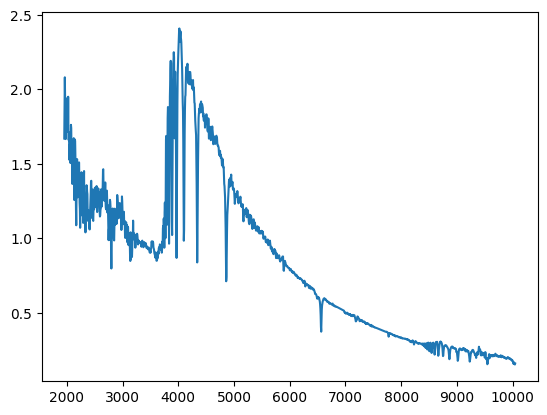

In [ ]:
# Ejemplo de espectro

path_spectra = '/content/uka0iii.dat.gz'
spectra = reader(path_spectra)


# Acá ploteamos el espectro con menor ruido

plt.plot(spectra[:,0], spectra[:,1])
plt.show()

In [ ]:
def normalizar(Path):
  espectro = reader(Path)
  x = espectro[:,0]
  y = espectro[:,1]
  suma = np.trapz(y,x)
  espectro[:,1] = y/suma
  return espectro

def procesar_archivos(archivos_dat_gz):
    resultados = {}

    for archivo in archivos_dat_gz:
        try:
            print(f"Procesando: {archivo}")
            espectro_normalizado = normalizar(archivo)
            resultados[archivo] = espectro_normalizado  # Guardar el espectro normalizado
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")

    return resultados

# Obtener la lista de archivos .dat.gz en un directorio específico
def obtener_archivos_dat_gz(directorio):
    archivos_dat_gz = []

    for archivo in os.listdir(directorio):
        if archivo.endswith('.dat.gz'):
            archivos_dat_gz.append(os.path.join(directorio, archivo))

    return archivos_dat_gz

In [ ]:
np.trapz(spectra[:,1], spectra[:,0])

6796.5936825

In [ ]:

def reader(PATH, ft='ascii'):
    '''
    Inputs:
    - PATH: Path del espectro
    - ft: formato del espectro
    '''
    tab = Table.read(PATH, format=ft)
    df_spectra = tab.to_pandas()


    df_spectra = df_spectra[df_spectra['col1']<10050]
    df_spectra = df_spectra[df_spectra['col1']>1950]

    if ft == 'ascii':

      # Col 4 es el espectro 3 (ya que el 1 es el 0 al plotear)
        np_sp = df_spectra[['col1', 'col4']].to_numpy()

    return np_sp

def normalizar(Path):
  espectro = reader(Path)
  x = espectro[:,0]
  y = espectro[:,1]
  suma = np.trapz(y,x)
  espectro[:,1] = y/suma
  return espectro


def procesar_archivos(archivos_dat_gz):
    resultados = {}

    for archivo in archivos_dat_gz:
        try:
            print(f"Procesando: {archivo}")
            espectro_normalizado = normalizar(archivo)
            resultados[archivo] = espectro_normalizado  # Guardar el espectro normalizado
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")

    return resultados

# Obtener la lista de archivos .dat.gz en un directorio específico
def obtener_archivos_dat_gz(directorio):
    archivos_dat_gz = []

    for archivo in os.listdir(directorio):
        if archivo.endswith('.dat.gz'):
            archivos_dat_gz.append(os.path.join(directorio, archivo))

    return archivos_dat_gz

In [ ]:
import os

# Directorio donde tienes los archivos descargados
directorio = '/content/'    #yo tengo los archivos guardados y descargados en esta ruta, quizas si lo ejecuta alguien mas pueda causar errores?

# Obtener todos los archivos .dat.gz
archivos_dat_gz = obtener_archivos_dat_gz(directorio)

# Procesar los archivos y aplicar normalización
resultados_normalizados = procesar_archivos(archivos_dat_gz)    #diccionario con los espectos normalizados

Procesando: /content/ukf0i.dat.gz
Procesando: /content/ukb3i.dat.gz
Procesando: /content/ukk0v.dat.gz
Procesando: /content/ukk3iv.dat.gz
Procesando: /content/uka5v.dat.gz
Procesando: /content/ukf0iii.dat.gz
Procesando: /content/ukb3iii.dat.gz
Procesando: /content/ukf5i.dat.gz
Procesando: /content/ukg5v.dat.gz
Procesando: /content/ukk0iv_new.dat.gz
Procesando: /content/ukrk1iii_new.dat.gz
Procesando: /content/ukg5iv.dat.gz
Procesando: /content/ukm4v_new.dat.gz
Procesando: /content/uko5v.dat.gz
Procesando: /content/ukg8v.dat.gz
Procesando: /content/ukb8i.dat.gz
Procesando: /content/ukg0iv.dat.gz
Procesando: /content/ukrk5iii.dat.gz
Procesando: /content/ukrg5iii.dat.gz
Procesando: /content/ukm0iii.dat.gz
Procesando: /content/ukf5v.dat.gz
Procesando: /content/ukg2iv.dat.gz
Procesando: /content/uko9v.dat.gz
Procesando: /content/ukm2v.dat.gz
Procesando: /content/ukrk1iii.dat.gz
Procesando: /content/ukb6iv.dat.gz
Procesando: /content/ukg5iii.dat.gz
Procesando: /content/uka0iv.dat.gz
Procesand

In [ ]:
#diccionario corregido
clases_esp = {
    "O" : resultados_normalizados["/content/uko5v.dat.gz"],
    "B" : resultados_normalizados["/content/ukb1v.dat.gz"],
    "A" : resultados_normalizados["/content/uka0v.dat.gz"],
    "F" : resultados_normalizados["/content/ukf6v.dat.gz"],
    "G" : resultados_normalizados["/content/ukg0v.dat.gz"],
    "K" : resultados_normalizados["/content/ukk3v.dat.gz"],
    "M" : resultados_normalizados["/content/ukm1v.dat.gz"],
    "GiganteRoja" : resultados_normalizados["/content/ukk3iii.dat.gz"],
    "RamaHorizontal"  : resultados_normalizados["/content/uka0iii.dat.gz"],
}

lambda_array = clases_esp["O"][:,0]

# Base function

In [ ]:
# Funciones a usar

def clase_espectral(m):
  clase = ""
  if (m >= 0.08) and (m < 0.45):
    clase = "M"
  elif (m >= 0.45) and (m < 0.8):
    clase = "K"
  elif (m >= 0.8) and (m < 1.04):
    clase = "G"
  elif (m >= 1.04) and (m < 1.4):
    clase = "F"
  elif (m >= 1.4) and (m < 2.1):
    clase = "A"
  elif (m >= 2.1) and (m < 16):
    clase = "B"
  elif (m >= 16):
    clase = "O"
  return clase


def Time_SP(M):
  return 10*(1/M)**3 # Gyrs



def Mass_L(M):
  if M <= 0.43:
    L = 0.23*(M)**2.3
  elif ((0.43 < M) and (M <= 2)):
    L = (M)**4
  elif ((2 < M) and (M <= 55)):
    L = 1.4*(M)**3.5
  else:
    L = 32000*(M)

  return L


def N_IMF(inf,sup, Ndatos):
  masas = np.linspace(inf,sup,Ndatos)
  Min = masas[:-1]
  Max = masas[1:]
  masas = (Min+Max)/2
  pesos = IMF(Min,Max)
  return pesos,masas

def IMF(Min, Max):
  return (1/1.35)*((Min**-1.35)-(Max**-1.35))


# Star class

In [ ]:
# Acá haremos la clase estrella

class Estrella:

    def __init__(self, masa, tiempo):
      self.M = masa  #masa
      self.T = tiempo #nacimiento
      self.L_sp = Mass_L(self.M) #luminisidad en sp
      self.T_sp = Time_SP(self.M) # tiempo en la secuencia principal
      self.clase = clase_espectral(self.M) #clase espectral
      self.L = self.L_sp


    # Esto lo definimos para crear el "update"
    def update(self, t):
        t = t
        espectro = np.zeros(shape=(1619, 2))

        # Si la estrella no evoluciona
        if self.M >= 5:

            if (t >= self.T) and (t < (self.T + self.T_sp)):
                espectro = clases_esp[f"{self.clase}"]
                self.L = self.L_sp

        # Si la estrella evoluciona
        else:
            # Secuencia principal
            if (t >= self.T) and (t < (self.T + self.T_sp)):
                espectro = clases_esp[f"{self.clase}"]
                self.L = self.L_sp

            # Rama gigante roja
            elif (t >= (self.T + self.T_sp)) and (t < (self.T + self.T_sp + 1)):
                espectro = clases_esp["GiganteRoja"]
                self.L = 70

            # Rama horizontal
            elif (t >= (self.T + self.T_sp + 1)) and (t < (self.T + self.T_sp + 1.1)):
                espectro = clases_esp["RamaHorizontal"]
                self.L = 113

        return espectro[:,1]





In [ ]:
hola = Estrella(1, 0)

In [ ]:
hola.clase

'G'

In [ ]:
hola.T_sp

10.0

In [ ]:
np.trapz(hola.update(6), lambda_array)

1.0

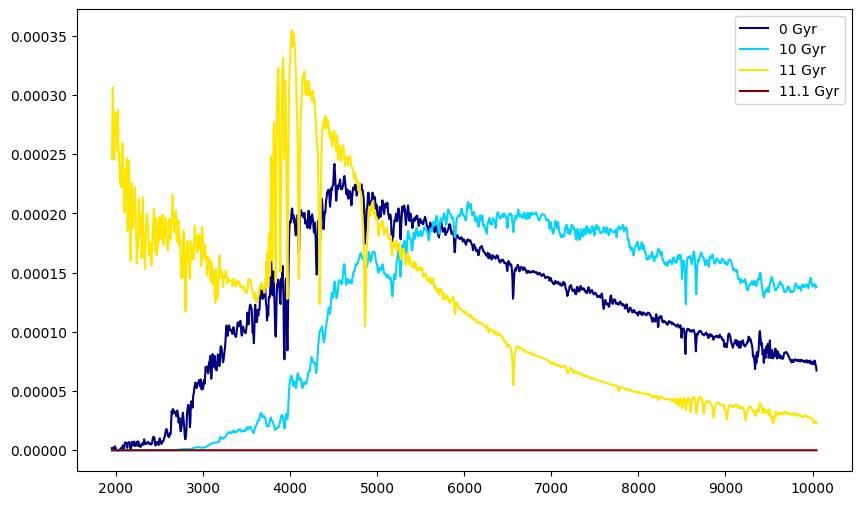

In [ ]:
# plot as a function of time with colormap
times2plot = [0, 10, 11, 11.1]
colors = plt.cm.jet(np.linspace(0, 1, len(times2plot)))
plt.figure(figsize=(10,6))
for i,t in enumerate(times2plot):
    plt.plot(lambda_array, hola.update(t), color=colors[i], label=f"{t} Gyr")
plt.legend()
plt.show()

We can do the same for a general case

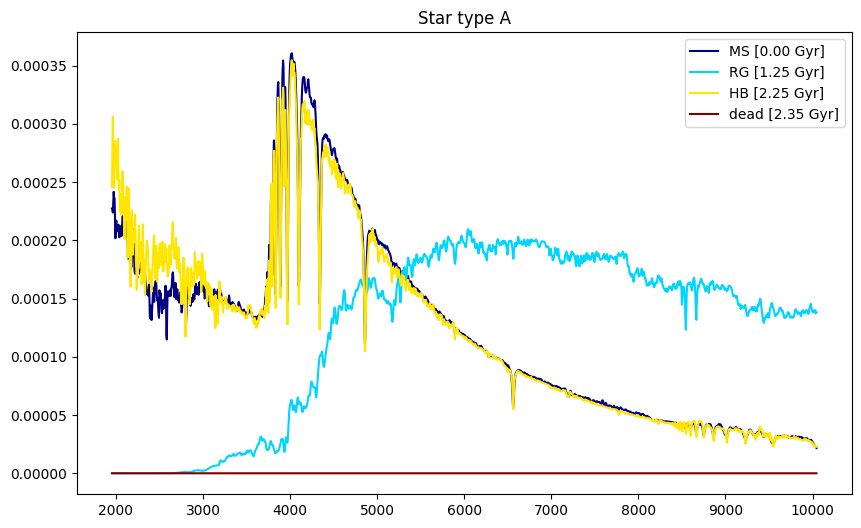

In [ ]:
mstar_test = 2
star_test = Estrella(mstar_test, 0)
tsp_test = star_test.T_sp

times2plot = [0, tsp_test, tsp_test + 1, tsp_test + 1.1]
colors = plt.cm.jet(np.linspace(0, 1, len(times2plot)))
stellar_classes = ['MS', 'RG', 'HB', 'dead']

plt.figure(figsize=(10,6))
plt.title('Star type %s' % star_test.clase)
for i,t in enumerate(times2plot):
    plt.plot(lambda_array, star_test.update(t), color=colors[i], label="%s [%.2f Gyr]"%(stellar_classes[i], t))
plt.legend()
plt.show()


We can do the same but now considering the luminosity

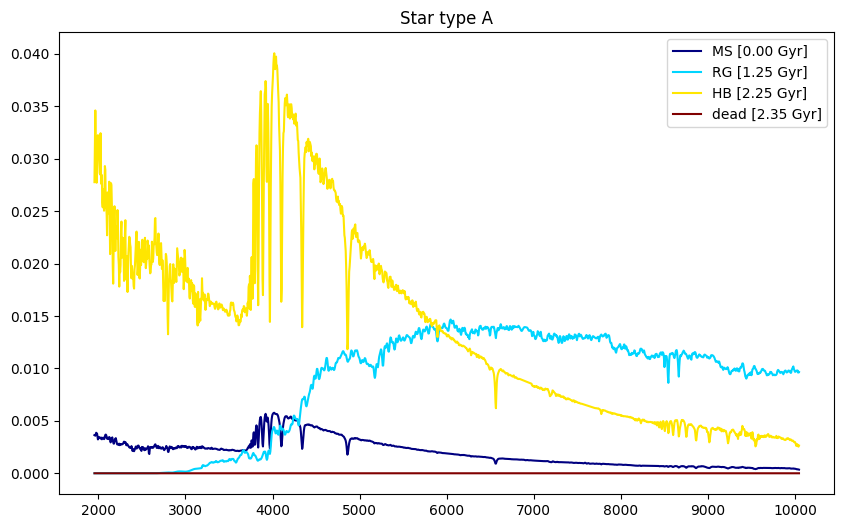

In [ ]:
mstar_test = 2
star_test = Estrella(mstar_test, 0)
tsp_test = star_test.T_sp

times2plot = [0, tsp_test, tsp_test + 1, tsp_test + 1.1]
colors = plt.cm.jet(np.linspace(0, 1, len(times2plot)))
stellar_classes = ['MS', 'RG', 'HB', 'dead']

plt.figure(figsize=(10,6))
plt.title('Star type %s' % star_test.clase)
for i,t in enumerate(times2plot):
    plt.plot(lambda_array, star_test.update(t)*star_test.L, color=colors[i], label="%s [%.2f Gyr]"%(stellar_classes[i], t))
plt.legend()
plt.show()


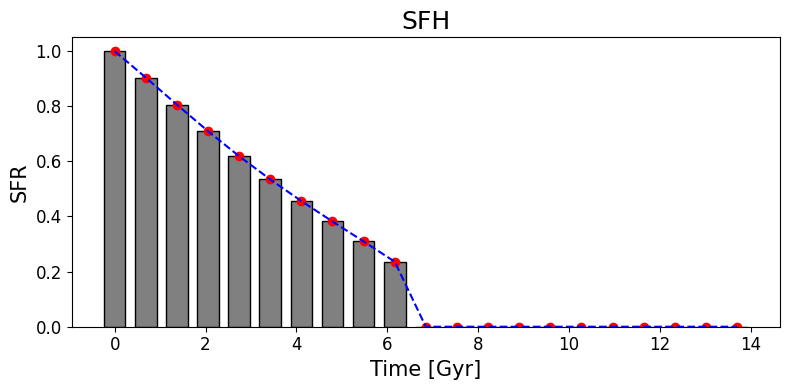

21
[1.         0.90395214 0.80563362 0.7096     0.61879588 0.5344035
 0.45598454 0.38183174 0.30943175 0.23597058 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [ ]:

def create_sfh(n_points, H_noise):
    # Randomize amplitude and phase
    rho = np.random.rand(H_noise) * np.logspace(0.5, -2.5, H_noise)
    phi = np.random.rand(H_noise) * 2 * np.pi

    # Accumulate r(t) over t = [0, 2*pi]
    t = np.linspace(0, np.pi, n_points+1)
    r = np.ones_like(t)
    for h in range(1, H_noise + 1):
        r += rho[h - 1] * np.sin(h * t + phi[h - 1])

    # Update t to go from 0 to 14.
    t = t / np.pi * 13.7

    # Update r to go from 0 to 1
    r_mask = r < 0.6 # Esto es para tener regiones sin formación. Este parámetro se puede variar
    r = r/r.max()
    r[r_mask] = 0

    return r, t



def display_sfh(r, t):
    plt.figure(figsize=(8, 4))
    plt.title('SFH', fontsize=18)

    plt.bar(t, r, color='grey', width=10/len(t), edgecolor='black')
    plt.plot(t, r, 'ro')
    plt.plot(t, r, '--b')
    plt.xlabel('Time [Gyr]', fontsize=15)
    plt.ylabel('SFR', fontsize=15)

    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

r, t = create_sfh(20, 5)
display_sfh(r, t)
print(len(r))
print(r)

# Galaxy Class

In [ ]:
class Galaxia:


    def __init__(self, tiempos_formacion, ratio, Min=0.08, Max=50, Ndatos=1_000 ):
        # Permitir que `tiempos_formacion` sea una lista de tiempos de formación
        self.tiempos_formacion = tiempos_formacion
        self.estrellas = []  # Lista para almacenar las estrellas
        self.ratio_formacion = ratio
        self.pesos = []

        p, masas_intermedias = N_IMF(Min, Max, Ndatos)


        # Generar estrellas para cada período de formación
        for tiempo, r in zip(self.tiempos_formacion,self.ratio_formacion):

            if r == 0:
                continue
            else:

                for i in range(len(masas_intermedias)):

                    masa = masas_intermedias[i]

                    estrella = Estrella(masa, tiempo)
                    self.estrellas.append((estrella, p[i]*r) )  # Guardar estrella y su peso


    def update(self, t_actual):



        total_espectros = np.zeros_like( clases_esp['O'][:,0])
        for estrella, peso in self.estrellas:
            espectro = estrella.update(t_actual)
            total_espectros += espectro * peso * estrella.L

        return total_espectros


In [ ]:
a = Galaxia([1,2],[1,0.25])

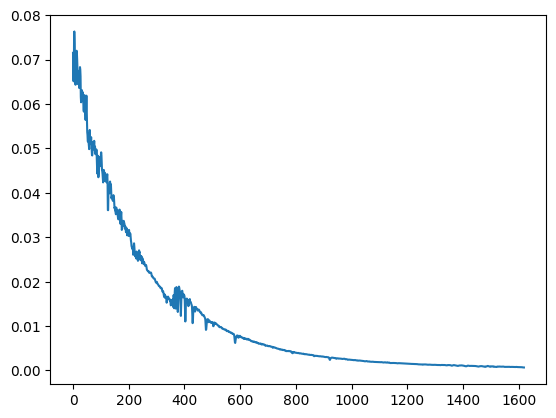

In [ ]:
plt.plot(a.update(1.01))
# Ahora funciona bien :D

Visualize evolution

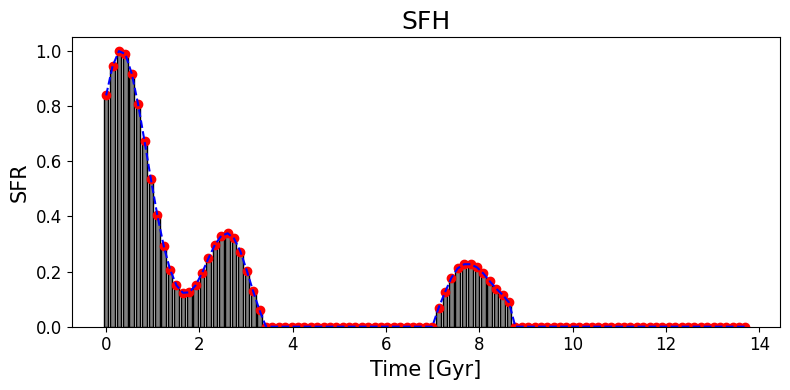

In [ ]:
sfh_r, sfh_t = create_sfh(100, 50)

display_sfh(sfh_r, sfh_t)

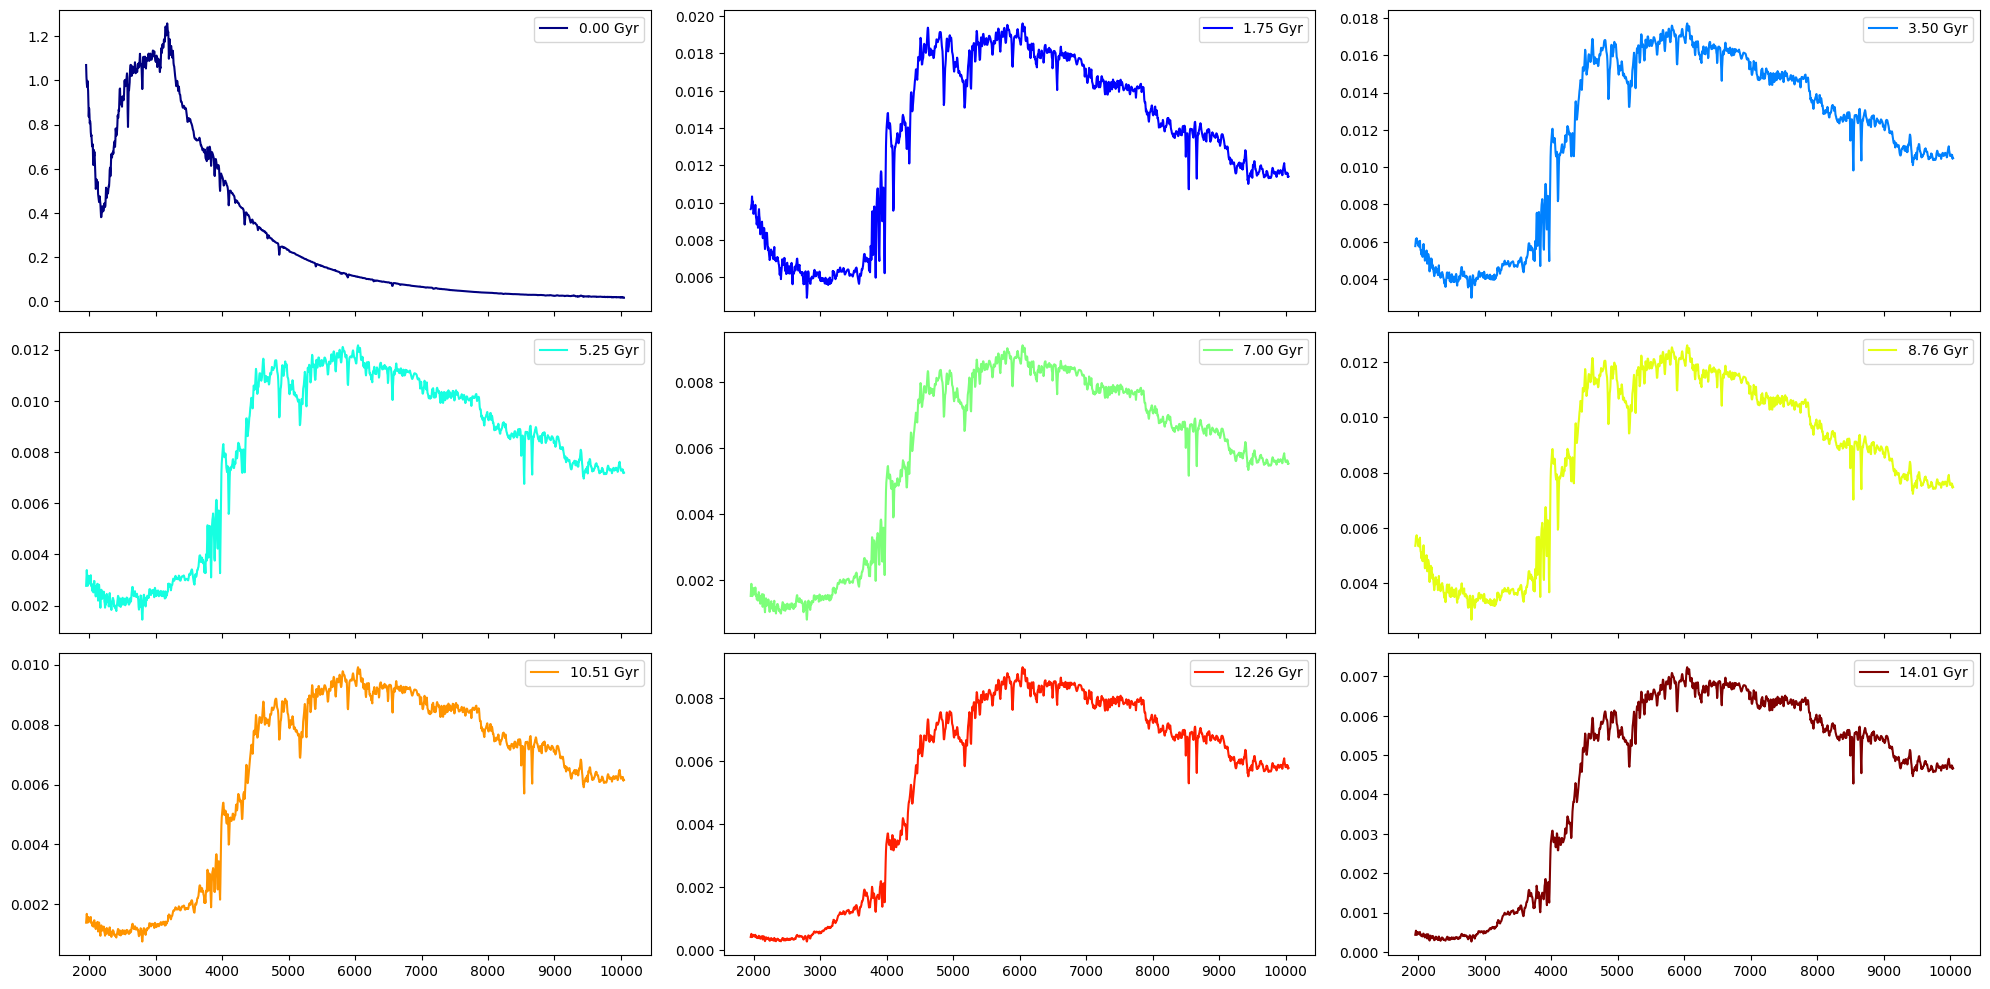

In [ ]:
galaxy_test = Galaxia(sfh_t, sfh_r)

times2plot = np.linspace(0, 14.01, 9)
colors = plt.cm.jet(np.linspace(0, 1, len(times2plot)))

ax, fig = plt.subplots(figsize=(20,10), nrows=3, ncols=3, sharex=True)
for i,t in enumerate(times2plot):
    plt.subplot(3,3,i+1)
    plt.plot(lambda_array, galaxy_test.update(t), color=colors[i], label="%.2f Gyr" %t)
    plt.legend()

plt.tight_layout()
plt.show()

# Get age from SFH


Esto es un poco más "complejo" de hacer, así que se los doy hecho. Vean eso sí las defs de edad en  [Thoma et al 2016](https://www.aanda.org/articles/aa/pdf/2017/06/aa28141-16.pdf) Chapter 4, eqs 4 a 7.

In [ ]:
def get_age(sfh_r, sfh_t, fraction, age_universe=14):
    cumulative_sum = np.cumsum(sfh_r)
    total_sum = np.sum(sfh_r)
    normalized_cumulative = cumulative_sum / total_sum

    above_index = np.where(normalized_cumulative >= fraction)[0][0]
    below_index = above_index - 1

    x1, x2 = sfh_t[below_index], sfh_t[above_index]
    y1, y2 = normalized_cumulative[below_index], normalized_cumulative[above_index]
    x_target = x1 + (fraction - y1) * (x2 - x1) / (y2 - y1)

    return age_universe-x_target

get_age(sfh_r, sfh_t, 0.5)

13.157203701692769

# Guardar espectros

In [ ]:
def normalizar_g(espectro):
  maximo = np.max(espectro)
  return espectro/maximo

def crear_galaxias(numero):
  galaxias = []

  for i in range(numero):
    sfh_r , sfh_t = create_sfh(100,50)
    galaxias.append(Galaxia(sfh_t, sfh_r))


  return galaxias



In [ ]:
galaxias = crear_galaxias(50)

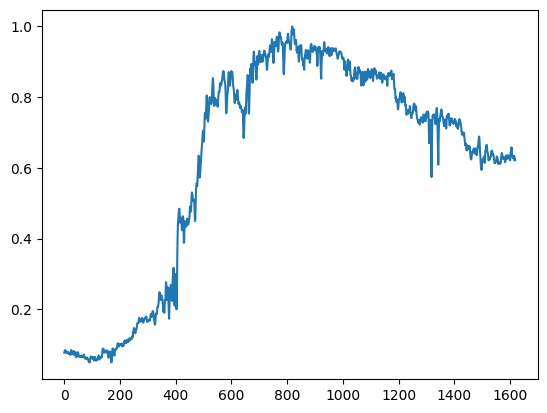

In [ ]:
normalizar_g(a.update(4))
plt.plot(normalizar_g(a.update(4)))

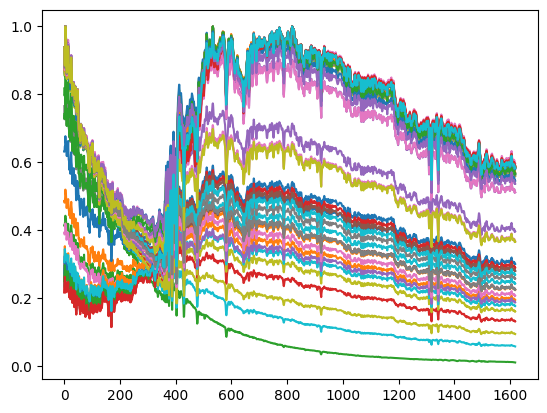

In [ ]:
for i in range(50):
  plt.plot(normalizar_g(galaxias[i].update(4)))

In [ ]:
!pip install tqdm

In [ ]:
import os
from tqdm import tqdm

def guardar_espectro(numero):
  espectraarray = np.zeros(shape = (numero,1619))
  edades = np.zeros(shape = (numero))
  for i in tqdm(range(numero), desc="Generando y guardando espectros"):
    sfh_r , sfh_t = create_sfh(100, 50)
    galaxia = Galaxia(sfh_t, sfh_r)
    edad = get_age(sfh_r, sfh_t, 0.25)

    espectraarray[i] = normalizar_g(galaxia.update(13.8))
    edades[i] = edad

    del galaxia

  # guardar datos
  os.makedirs('data', exist_ok=True)
  np.save('data/espectros.npy', espectraarray)
  np.save('data/edades.npy', edades)

  return espectraarray, edades




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/data /content/drive/MyDrive/Modulo

cp: cannot stat '/content/data': No such file or directory


In [ ]:
guardar_espectro(7000)

Generando y guardando espectros:   0%|          | 11/7000 [00:19<3:27:00,  1.78s/it]


KeyboardInterrupt: 

Cargar modelo

In [ ]:
!cp -r /content/drive/MyDrive/Modulo /content/data

In [ ]:
espectro = np.load('/content/data/espectros.npy')
edades = np.load('/content/data/edades.npy')

In [ ]:
def guardar_por_rango(numero,inicio,final):
  espectra = []
  edades = []

  while len(espectra) != numero:
    sfh_r , sfh_t = create_sfh(100, 50)
    galaxia = Galaxia(sfh_t, sfh_r)
    edad = get_age(sfh_r, sfh_t, 0.25)

    if (edad >= inicio) and (edad <= final):
      espectra.append(normalizar_g(galaxia.update(13.8)))
      edades.append(edad)

    del galaxia

  espectraarray = np.array(espectra)
  edades = np.array(edades)

  # guardar datos
  os.makedirs('data', exist_ok=True)
  np.save('data/espectros.npy', espectraarray)
  np.save('data/edades.npy', edades)

  return espectraarray, edades